## RVT default module

Module rvt.default is meant to quickly calculate or save any rvt visualization (suitable for beginner python users).

To calculate visualization we need visualization parameters (e.g. hillshade sun azimuth). Module default has a class rvt.default.DefultValues() where all visualization parameters are stored as attributes of this class. This class also contains methods to get (calculate) numpy array of specific visualization or to calculate and save specific visualization as GeoTIFF, all methods use class atributes (set parameters). For get methods we need dem numpy array, for save methods we need dem path. If you call save method for specific visualization (e.g. default.save_hillshade()) it will be saved in DEM (dem_path) direcotry, to change output directory you have to input output directory as string in custom_dir (save methods parameter). Save methods also have two boolean parameters save_float and save_8bit. If save_float is True method will save visulization as float and if save_8bit is True method will bytescale visualization (0-255) and save it. Both can be True to save both.

Let's import modules:

In [4]:
import matplotlib.pyplot as plt
import rvt.default

To get visualization array we also need input DEM numpy array. We will use default module function get_raster_arr() to read it.

In [5]:
dem_path = r"../test_data/TM1_564_146.tif"  # set path to your dem

In [6]:
dict_dem = rvt.default.get_raster_arr(dem_path)

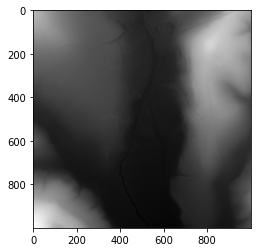

In [7]:
dem_arr = dict_dem["array"]  # numpy array of DEM
dem_resolution = dict_dem["resolution"]
dem_res_x = dem_resolution[0]  # resolution in X direction
dem_res_y = dem_resolution[1]  # resolution in Y direction
dem_no_data = dict_dem["no_data"]

plt.imshow(dem_arr, cmap='gray')  # show DEM

Create rvt.default.DefaultValues() class:

In [8]:
default = rvt.default.DefaultValues()  # we created instance of class and stored it in default variable

### Slope Gradient

Set parameters:

In [9]:
default.slp_output_units = "degree"

Calculate numpy array:

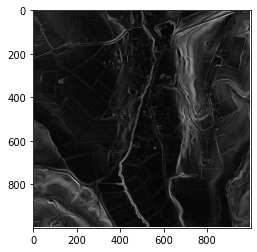

In [10]:
slope_arr = default.get_slope(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)
plt.imshow(slope_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [11]:
default.save_slope(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Hillshade

Set parameters:

In [12]:
default.hs_sun_el = 35 
default.hs_sun_azi = 315

Calculate numpy array:

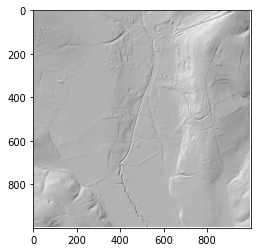

In [13]:
hillshade_arr = default.get_hillshade(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)
plt.imshow(hillshade_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [14]:
default.save_hillshade(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Multiple directions hillshade

Set parameters:

In [15]:
default.mhs_nr_dir = 16
default.mhs_sun_el = 35

Calculate numpy array:

In [16]:
mhs_arr = default.get_multi_hillshade(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)

Calculate and save as GeoTIFF in DEM directory:

In [17]:
default.save_multi_hillshade(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Simple Local Relief Model (SLRM)

Set parameters:

In [18]:
default.slrm_rad_cell = 20

Calculate numpy array:

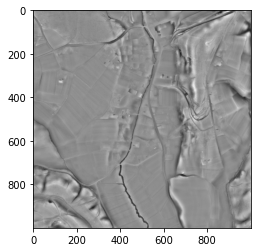

In [19]:
slrm_arr = default.get_slrm(dem_arr=dem_arr)
plt.imshow(slrm_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [20]:
default.save_slrm(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Multi-Scale Relief Model (MSRM)

Set parameters:

In [21]:
default.msrm_feature_min = 1
default.msrm_feature_max = 5
default.msrm_scaling_factor = 3

Calculate numpy array:

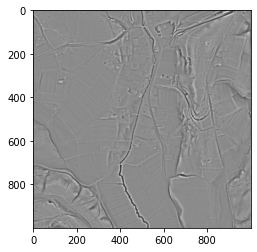

In [22]:
msrm_arr = default.get_msrm(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(msrm_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [23]:
default.save_msrm(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Sky-view factor, Anisotropic sky-view factor, Positive - openness

Set parameters:

In [24]:
# parameters for all three
default.svf_n_dir = 16
default.svf_r_max = 10
default.svf_noise = 0
# parameters for asvf
default.asvf_dir = 315
default.asvf_level = 1

Calculate numpy array:

In [25]:
svf_asvf_opns_dict = default.get_sky_view_factor(dem_arr=dem_arr, resolution=dem_res_x,
                                                 compute_svf=True, compute_asvf=True, compute_opns=True)

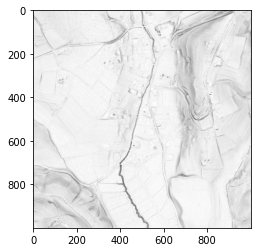

In [26]:
svf_arr = svf_asvf_opns_dict["svf"]
plt.imshow(svf_arr, cmap='gray')

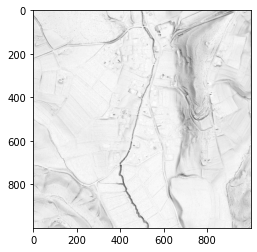

In [27]:
asvf_arr = svf_asvf_opns_dict["asvf"]
plt.imshow(asvf_arr, cmap='gray')

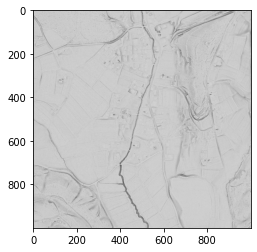

In [28]:
opns_arr = svf_asvf_opns_dict["opns"]
plt.imshow(opns_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [29]:
default.save_sky_view_factor(dem_path=dem_path, save_svf=True, save_asvf=True, save_opns=True,
                             custom_dir=None, save_float=True, save_8bit=True)

1

### Negative - openness

Set parameters (svf_parameters):

In [30]:
default.svf_n_dir = 16
default.svf_r_max = 10
default.svf_noise = 0

Calculate numpy array:

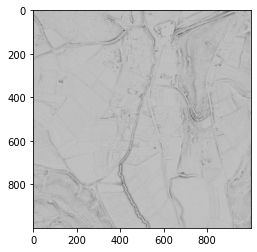

In [31]:
neg_opns_arr = default.get_neg_opns(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(neg_opns_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [32]:
default.save_neg_opns(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Local dominance

Set parameters:

In [33]:
default.ld_min_rad = 10
default.ld_max_rad = 20
default.ld_rad_inc = 1
default.ld_anglr_res = 15
default.ld_observer_h = 1.7

Calculate numpy array:

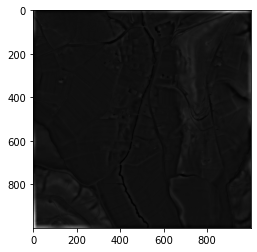

In [34]:
local_dom_arr = default.get_local_dominance(dem_arr=dem_arr)
plt.imshow(local_dom_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [35]:
default.save_local_dominance(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Sky illumination

Set parameters:

In [36]:
default.sim_sky_mod = "overcast"
default.sim_compute_shadow = 0
default.sim_shadow_dist = 100
default.sim_nr_dir = 32
default.sim_shadow_az = 315
default.sim_shadow_el = 35

Calculate numpy array:

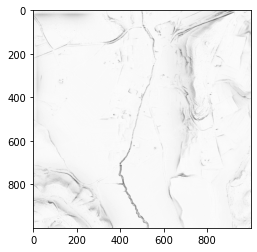

In [37]:
sky_illum_arr = default.get_sky_illumination(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(sky_illum_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [38]:
default.save_sky_illumination(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Multi-Scale Topographic Position (MSTP)

Set parameters:

In [39]:
default.mstp_local_scale = (1, 5, 1)
default.mstp_meso_scale = (5, 50, 5)
default.mstp_broad_scale = (50, 500, 50)
default.mstp_lightness = 1.2

Calculate numpy array:

In [40]:
mstp_arr = default.get_mstp(dem_arr=dem_arr)

Calculate and save as GeoTIFF in DEM directory:

In [41]:
default.save_mstp(dem_path=dem_path, custom_dir=None)

1